# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
df_image = pd.read_csv('image-prediction.tsv', sep = '\t')
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [4]:
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_twitter_archive.tweet_id.values
#len(tweet_ids)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

In [6]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#   This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#   for tweet_id in tweet_ids:
#       count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#           tweet = api.get_status(tweet_id, tweet_mode='extended')
#           print("Success")
#           json.dump(tweet._json, outfile)
#           outfile.write('\n')
#       except tweepy.TweepError as e:
#           print("Fail")
#           fails_dict[tweet_id] = e
#           pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [7]:
#To extract the tweet-json.txt from the zipfile
import zipfile
with zipfile.ZipFile('tweet-json.zip', 'r') as myzip:
    myzip.extractall()

In [5]:
#To read the 
tweet_id = []
retweet_count = []
favorite_count = []
with open('tweet-json', 'r') as file:
    for line in file:
        string = file.readline()
        data = json.loads(string)
        tweet_id.append(data['id_str'])
        retweet_count.append(data['retweet_count'])
        favorite_count.append(data['favorite_count'])
        
api_df = pd.DataFrame({'tweet_id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})

In [6]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
tweet_id          1177 non-null object
retweet_count     1177 non-null int64
favorite_count    1177 non-null int64
dtypes: int64(2), object(1)
memory usage: 27.7+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Trying to confirm the number of unique IDs in the twitter dataset

In [8]:
unique_tweet_ids = np.union1d(df_twitter_archive.tweet_id.unique(), df_image.tweet_id.unique())
unique_tweet_ids.size

2356

In [9]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
rating_denominator_no_10 = df_twitter_archive.query('rating_denominator != 10')[['text','rating_numerator', 'rating_denominator']]
rating_denominator_no_10

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


In [11]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 3 columns):
tweet_id          1177 non-null object
retweet_count     1177 non-null int64
favorite_count    1177 non-null int64
dtypes: int64(2), object(1)
memory usage: 27.7+ KB


In [12]:
df_twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

### Quality issues
1. Tweet_id datatype is not uniform.

2. Timestamp feature is an object instead of DateTime data type

3. Multiple missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

4. Some images are not for dogs

5. Tweet_id 835246439529840640 will throw a zero division error, the rating_denominator is zero.

6. Actual source to be extracted from the html code in the source column.

7. Missing values in name column and incoherent and reocurring names like a,an,by,O.

8. No actual rating column

### Tidiness issues
1. The types named doggo, floofer, pupper and puppo should be put under one column header.

2. Multiple breed prediction columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
twitter_archive_new = df_twitter_archive.copy()
image_pred_new = df_image.copy()
tweet_ext_new = api_df.copy()

### Issue #1:

#### Define: Change tweet_id data type to str in all datasets

#### Code

In [14]:
twitter_archive_new.tweet_id = twitter_archive_new.tweet_id.astype(str)
image_pred_new.tweet_id = image_pred_new.tweet_id.astype(str)
tweet_ext_new.tweet_id = tweet_ext_new.tweet_id.astype(str)

#### Test

In [15]:
image_pred_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Merging all three datasets together before proceeding with the cleaning process

In [16]:
df_merged = twitter_archive_new.set_index('tweet_id').join(tweet_ext_new.set_index('tweet_id'),lsuffix='_basic', rsuffix='_extended')
df_merged = df_merged.join(image_pred_new.set_index('tweet_id'),lsuffix='', rsuffix='_breed')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 1177 non-null float64
favo

In [17]:
#Create a copy of the merged dataset for cleaning
merged_cp = df_merged.copy()
merged_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 1177 non-null float64
favo

### Issue #2:

#### Define: Change timestamp dtype to datetime and rename as tweet_date

#### Code

In [18]:
merged_cp.timestamp = pd.to_datetime(merged_cp.timestamp)
merged_cp.rename(columns={'timestamp':'tweet_date'}, inplace=True)

#### Test

In [19]:
merged_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
tweet_date                    2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 1177 non-null floa

## Removing rows with retweets before dropping the retweeted_status_id column

In [20]:
#confirming for rows with retweets
merged_cp.retweeted_status_id.notnull().sum()

181

In [21]:
#Extracting rows with NaN values only
merged_cp = merged_cp[pd.isnull(merged_cp['retweeted_status_id'])]

In [22]:
#Confirming retweets rows have been dropped
merged_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
tweet_date                    2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 1085 non-null float64
fa

# Issue #3: 

### Define: Missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

### Code

In [23]:
#Dropping the above mentioned columns due to large amount of missing values
merged_cp.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test

In [24]:
merged_cp.head()

,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Issue #4

### Define: Dataset contains images not for dogs

### Code

In [25]:
#Removing rows where p#_dog is False
merged_cp.drop(merged_cp.query("p1_dog == False or p2_dog == False or p3_dog == False").index, inplace = True)

### Test

In [74]:
merged_cp

,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,...,1.0,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,...,1.0,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
889638837579907072,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,...,1.0,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True


## Issue #5

### Define: Rating error due to zero rating_denominator

### Code

In [26]:
#Drop rows where rating_denominator is zero since that would lead to zero division error
merged_cp.drop(merged_cp.query('rating_denominator == 0').index, inplace = True)

In [27]:
#Create a rating feature to solve quality issue #8
merged_cp['ratings'] = merged_cp['rating_numerator']/merged_cp['rating_denominator']

In [28]:
#Drop rating_numerator and denominator
merged_cp.drop(columns={'rating_numerator','rating_denominator'},axis = 1, inplace = True)

### Test

In [29]:
merged_cp

,tweet_date,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings
tweet_id,,,,,,,,,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,6514.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,NaN,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,NaN,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2
890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,16716.0,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,1.3
890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,None,None,None,NaN,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,1.3
890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,None,None,None,7711.0,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,1.4
890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,None,None,None,None,NaN,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,1.3
889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,None,None,None,None,puppo,NaN,...,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,1.3
889638837579907072,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,Ted,None,None,None,None,4735.0,...,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,1.2


## Issue #6

### Define: Extracting Source from Html code

### Code

In [30]:
merged_cp['extracted_source'] = merged_cp.source.str.extract("\>(.*)\<")
merged_cp.drop('source', axis = 1, inplace = True)

### Test

In [31]:
merged_cp['extracted_source']

tweet_id
892177421306343426    Twitter for iPhone
891815181378084864    Twitter for iPhone
891327558926688256    Twitter for iPhone
890729181411237888    Twitter for iPhone
890609185150312448    Twitter for iPhone
890240255349198849    Twitter for iPhone
890006608113172480    Twitter for iPhone
889665388333682689    Twitter for iPhone
889638837579907072    Twitter for iPhone
889531135344209921    Twitter for iPhone
889278841981685760    Twitter for iPhone
888917238123831296    Twitter for iPhone
888804989199671297    Twitter for iPhone
888554962724278272    Twitter for iPhone
888078434458587136    Twitter for iPhone
887705289381826560    Twitter for iPhone
887473957103951883    Twitter for iPhone
887101392804085760    Twitter for iPhone
886736880519319552    Twitter for iPhone
886366144734445568    Twitter for iPhone
886267009285017600    Twitter for iPhone
885984800019947520    Twitter for iPhone
885528943205470208    Twitter for iPhone
885518971528720385    Twitter for iPhone
8851676

## Issue #7

### Define: name column issues (missing values and inappropriate names)

### Code

In [32]:
#Getting the list of names used
pd.set_option('max_rows', None)
merged_cp.name.value_counts()

None              429
a                  32
Cooper              9
Charlie             8
the                 7
Oliver              7
Sadie               6
Koda                6
Lucy                6
Leo                 5
Winston             5
Bo                  5
Tucker              5
Oscar               5
Toby                5
Daisy               4
Maggie              4
Sammy               4
Lola                4
Bear                4
Stanley             4
Sophie              4
Larry               4
Finn                4
Scooter             4
Gus                 4
Bentley             4
Reggie              4
Dave                4
Boomer              3
Scout               3
Ellie               3
Rusty               3
Wilson              3
Carl                3
Rosie               3
Jax                 3
Jack                3
Zeke                3
Louis               3
Brody               3
Duke                3
Bella               3
Beau                3
Winnie              3
Sebastian 

In [33]:
#Replacing irrelevant names with None 
names_like = ['a','O','the', 'very','just','one','not','mad','getting','an','Dot','old','officially','my']

for i in names_like:
    merged_cp['name'].replace(i, None, inplace = True)

### Test

In [34]:
merged_cp.name.value_counts()

None              445
Oliver              9
Cooper              9
Charlie             8
Winston             6
Lucy                6
Koda                6
Sadie               6
Tucker              5
Oscar               5
Bentley             5
Toby                5
Leo                 5
Bo                  5
Stanley             4
Scooter             4
Dave                4
Gus                 4
Maggie              4
Lola                4
Bubbles             4
Larry               4
Reggie              4
Finn                4
Sammy               4
Louis               4
Daisy               4
Bear                4
Sophie              4
Penny               3
Reese               3
Jack                3
Jax                 3
Jimothy             3
Raymond             3
Scout               3
Dexter              3
Lenny               3
Chester             3
Sebastian           3
Boomer              3
Rosie               3
Rusty               3
Bella               3
Beau                3
Ted       

### Addressing Tidiness issues

## Issue #1

### Define: Grouping the age type under one column

### Code

In [35]:
# replace "None" with '' in each column
for i in ['doggo','floofer', 'pupper', 'puppo']:
    merged_cp[i].replace('None', '', inplace = True)

#Add the four string columns together to create one column called dog_type
merged_cp['dog_type'] = merged_cp['doggo'] + merged_cp['floofer']+ merged_cp['pupper'] + merged_cp['puppo']
merged_cp.dog_type.value_counts()

                1155
pupper           140
doggo             51
puppo             20
floofer            8
doggopupper        7
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

In [35]:
#Drop doggo, floofer,puppo, pupper columns
merged_cp.drop(columns = {'doggo','floofer','pupper','puppo'}, axis =1, inplace=True)

In [36]:
#Dropping rows with missing Urls
merged_cp.jpg_url.dropna(inplace = False)

tweet_id
892177421306343426      https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
891815181378084864      https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
891327558926688256      https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
890729181411237888      https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
890609185150312448      https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
890240255349198849      https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
890006608113172480      https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg
889665388333682689      https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg
889638837579907072      https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg
889531135344209921      https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
889278841981685760    https://pbs.twimg.com/ext_tw_video_thumb/88927...
888917238123831296      https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
888804989199671297      https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg
888554962724278272      https://pbs.twimg.com/media/DFT

### Test

In [37]:
merged_cp

,tweet_date,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings,extracted_source,dog_type
tweet_id,,,,,,,,,,,,,,,,,,,,,
892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,,,,6514.0,33819.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,1.300000,Twitter for iPhone,
891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,,,,NaN,NaN,...,True,malamute,0.078253,True,kelpie,0.031379,True,1.200000,Twitter for iPhone,
891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,,,,NaN,NaN,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.200000,Twitter for iPhone,
890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,,,,,16716.0,56848.0,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,1.300000,Twitter for iPhone,
890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,,,,,NaN,NaN,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,1.300000,Twitter for iPhone,
890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,,,,7711.0,32467.0,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,1.400000,Twitter for iPhone,doggo
890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,Koda,,,,,NaN,NaN,...,True,Pomeranian,0.013884,True,chow,0.008167,True,1.300000,Twitter for iPhone,
889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,None,,,,puppo,NaN,NaN,...,True,Cardigan,0.027356,True,basenji,0.004633,True,1.300000,Twitter for iPhone,puppo
889638837579907072,2017-07-25 00:10:02,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,Ted,,,,,4735.0,27672.0,...,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,1.200000,Twitter for iPhone,


## Issue #2

### Define:

### Code

In [38]:
def get_attr(x):
    """
    input: 
    Columns: p1_dog, p1/p1_conf, p2_dog, p2/p2_conf, p3_conf
    output:
    Results after checking the true/false of the p1_dog and p2_dog columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]

merged_cp['dog_breed'] = merged_cp[['p1_dog', 'p1', 'p2_dog', 'p2', 'p3']].apply(get_attr, axis = 1)
merged_cp['dog_conf'] = merged_cp[['p1_dog', 'p1_conf', 'p2_dog', 'p2_conf', 'p3_conf']].apply(get_attr, axis = 1)
merged_cp.iloc[:,13:].head(11)

,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings,extracted_source,dog_type,dog_breed,dog_conf
tweet_id,,,,,,,,,,,,,
892177421306343426,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3,Twitter for iPhone,,Chihuahua,0.323581
891815181378084864,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2,Twitter for iPhone,,Chihuahua,0.716012
891327558926688256,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2,Twitter for iPhone,,basset,0.555712
890729181411237888,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,1.3,Twitter for iPhone,,Pomeranian,0.566142
890609185150312448,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,1.3,Twitter for iPhone,,Irish_terrier,0.487574
890240255349198849,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,1.4,Twitter for iPhone,doggo,Pembroke,0.511319
890006608113172480,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,1.3,Twitter for iPhone,,Samoyed,0.957979
889665388333682689,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,1.3,Twitter for iPhone,puppo,Pembroke,0.966327
889638837579907072,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,1.2,Twitter for iPhone,,French_bulldog,0.991650


In [39]:
merged_cp.drop(['p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'],axis = 1, inplace = True)

### Test

In [40]:
merged_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383 entries, 892177421306343426 to 666020888022790149
Data columns (total 17 columns):
tweet_date          1383 non-null datetime64[ns]
text                1383 non-null object
expanded_urls       1326 non-null object
name                1383 non-null object
doggo               1383 non-null object
floofer             1383 non-null object
pupper              1383 non-null object
puppo               1383 non-null object
retweet_count       690 non-null float64
favorite_count      690 non-null float64
jpg_url             1203 non-null object
img_num             1203 non-null float64
ratings             1383 non-null float64
extracted_source    1383 non-null object
dog_type            1383 non-null object
dog_breed           1203 non-null object
dog_conf            1203 non-null float64
dtypes: datetime64[ns](1), float64(5), object(11)
memory usage: 234.5+ KB


In [41]:
merged_cp.dog_breed = merged_cp.dog_breed.str.replace('_',' ')
merged_cp.dog_breed = merged_cp.dog_breed.str.lower()
merged_cp.dog_breed.value_counts()

golden retriever                  119
pembroke                           77
labrador retriever                 75
chihuahua                          50
pug                                39
pomeranian                         28
chow                               26
toy poodle                         26
malamute                           26
samoyed                            25
cocker spaniel                     23
french bulldog                     20
miniature pinscher                 20
german shepherd                    17
beagle                             17
siberian husky                     17
staffordshire bullterrier          16
shih-tzu                           15
rottweiler                         15
chesapeake bay retriever           15
shetland sheepdog                  15
maltese dog                        15
cardigan                           14
eskimo dog                         14
great pyrenees                     13
italian greyhound                  13
lakeland ter

## Carrying out further cleaning

In [42]:
#Checking for duplicates
merged_cp.duplicated().sum()

0

In [43]:
merged_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383 entries, 892177421306343426 to 666020888022790149
Data columns (total 17 columns):
tweet_date          1383 non-null datetime64[ns]
text                1383 non-null object
expanded_urls       1326 non-null object
name                1383 non-null object
doggo               1383 non-null object
floofer             1383 non-null object
pupper              1383 non-null object
puppo               1383 non-null object
retweet_count       690 non-null float64
favorite_count      690 non-null float64
jpg_url             1203 non-null object
img_num             1203 non-null float64
ratings             1383 non-null float64
extracted_source    1383 non-null object
dog_type            1383 non-null object
dog_breed           1203 non-null object
dog_conf            1203 non-null float64
dtypes: datetime64[ns](1), float64(5), object(11)
memory usage: 234.5+ KB


In [92]:
#Checking for null values
merged_cp.isnull().sum()

tweet_date            0
text                  0
expanded_urls        57
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
retweet_count       693
favorite_count      693
jpg_url             180
img_num             180
ratings               0
extracted_source      0
dog_type              0
dog_breed           180
dog_conf            180
dtype: int64

In [44]:
#Dropping null values
merged_cp = merged_cp.dropna(axis =0, how = 'any' )

In [45]:
#Checking if nulls have been removed
merged_cp.isnull().sum()

tweet_date          0
text                0
expanded_urls       0
name                0
doggo               0
floofer             0
pupper              0
puppo               0
retweet_count       0
favorite_count      0
jpg_url             0
img_num             0
ratings             0
extracted_source    0
dog_type            0
dog_breed           0
dog_conf            0
dtype: int64

In [46]:
merged_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 892177421306343426 to 666020888022790149
Data columns (total 17 columns):
tweet_date          598 non-null datetime64[ns]
text                598 non-null object
expanded_urls       598 non-null object
name                598 non-null object
doggo               598 non-null object
floofer             598 non-null object
pupper              598 non-null object
puppo               598 non-null object
retweet_count       598 non-null float64
favorite_count      598 non-null float64
jpg_url             598 non-null object
img_num             598 non-null float64
ratings             598 non-null float64
extracted_source    598 non-null object
dog_type            598 non-null object
dog_breed           598 non-null object
dog_conf            598 non-null float64
dtypes: datetime64[ns](1), float64(5), object(11)
memory usage: 84.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [47]:
merged_cp.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Here, I would generate questions and get insight using visualizations.

### Insights:
1. What is the trend in retweets and favoriting between 2015 and 2017?

2. Which dog breed has the highest retweet count and favorite count?

3. Which dog breed and type has the highest rating?

### Visualization

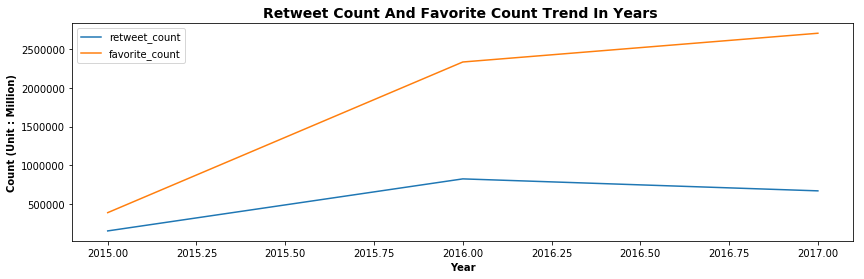

In [48]:
data = merged_cp.groupby(merged_cp.tweet_date.dt.year)["retweet_count","favorite_count"].sum()
# plot the graph
data.plot(rot=0,figsize=(14,4));

# Add title and format it
plt.title('retweet count and favorite count trend in years '.title(),
               fontsize = 14, weight = "bold");

# Add x label and format it
plt.xlabel('Year'.title(),fontsize = 10, weight = "bold");

# Add y label and format it
plt.ylabel("Count (unit : million)".title(),
               fontsize = 10, weight = "bold");


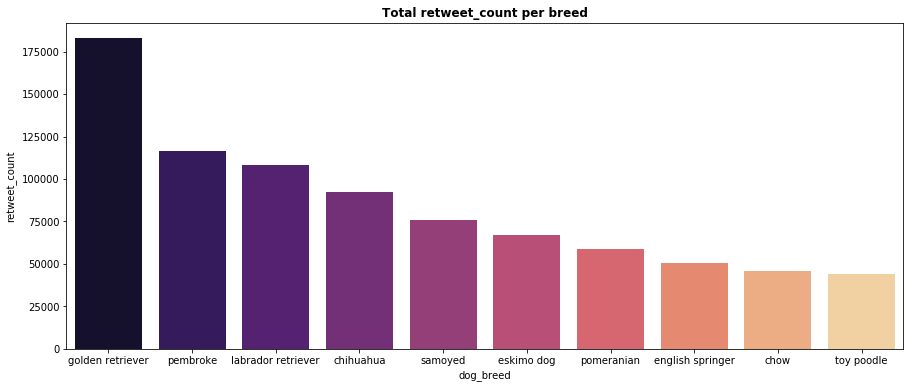

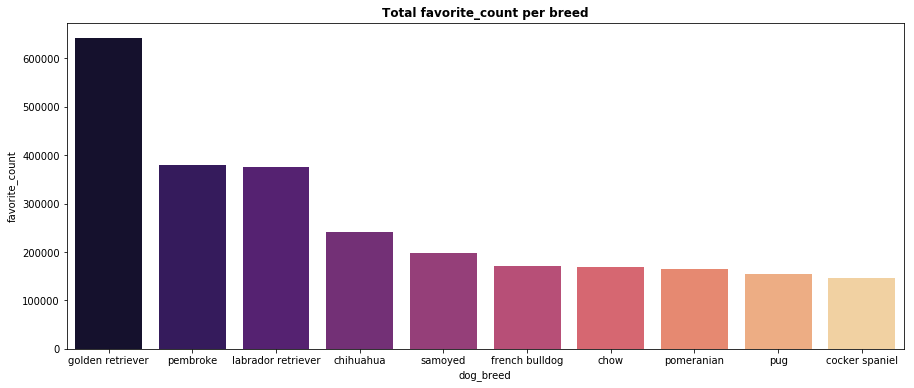

In [49]:
df_dog_breed = merged_cp.groupby(merged_cp.dog_breed).agg({'retweet_count': 'sum', 'favorite_count': 'sum'}).reset_index()

# Check the top breeds
for i in ['retweet_count', 'favorite_count']:
    fig, ax = plt.subplots(figsize = (15,6))
    ax = sns.barplot(x = 'dog_breed', y = i, data = df_dog_breed.sort_values(i, \
    ascending = False).iloc[:10], palette = 'magma')
    ax.set_title('Total ' + i + ' per breed', weight = 'bold')

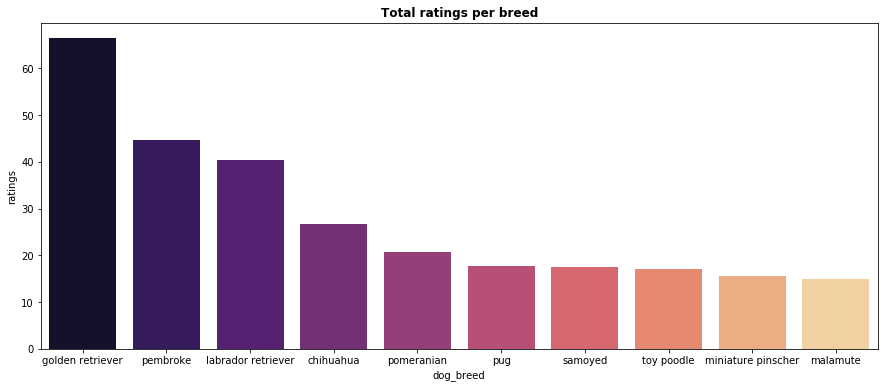

In [50]:
df_dog_breed = merged_cp.groupby(merged_cp.dog_breed).agg({'ratings': 'sum'}).reset_index()

# Check the top breeds
for i in ['ratings']:
    fig, ax = plt.subplots(figsize = (15,6))
    ax = sns.barplot(x = 'dog_breed', y = i, data = df_dog_breed.sort_values(i, \
    ascending = False).iloc[:10], palette = 'magma')
    ax.set_title('Total ' + i + ' per breed', weight = 'bold')

<function matplotlib.pyplot.show(*args, **kw)>

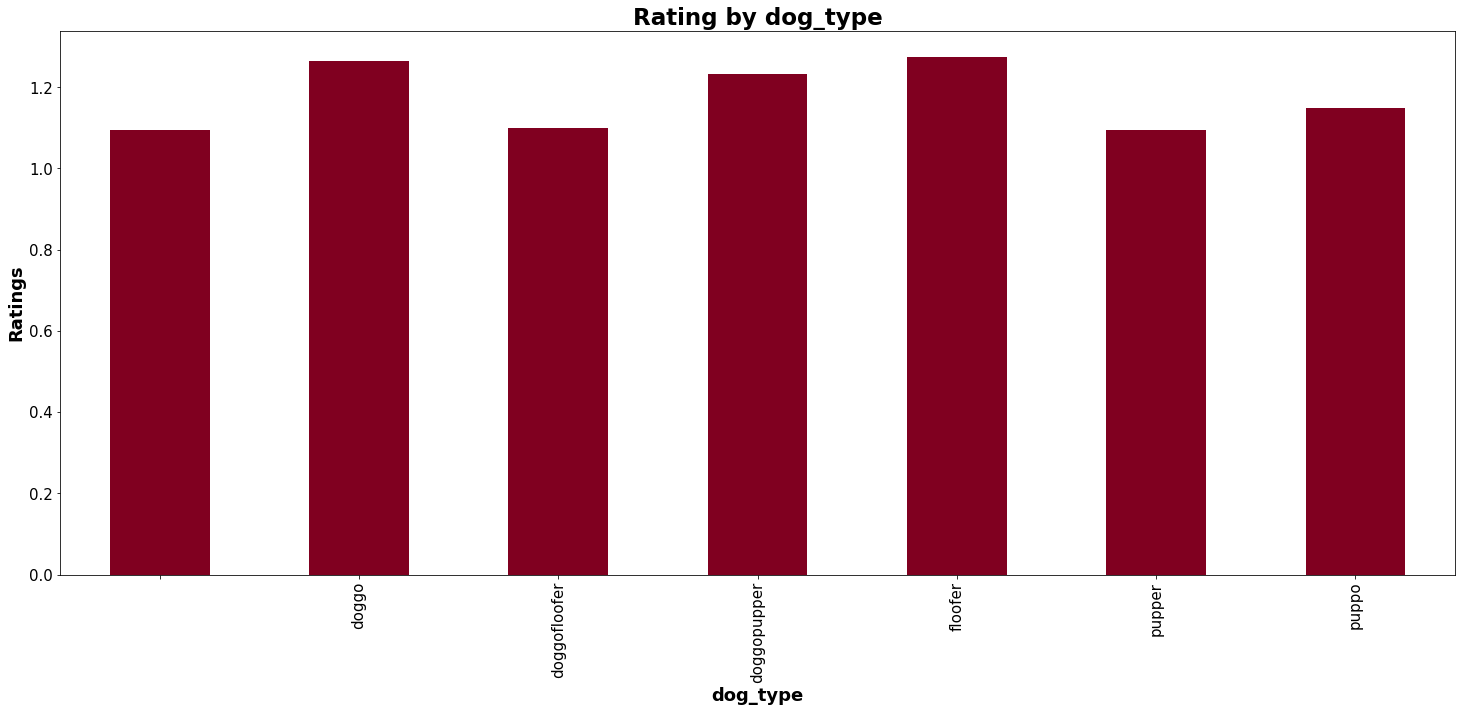

In [51]:
Fig5 = plt.figure(figsize = (25, 10))
merged_cp.groupby(['dog_type']).mean()['ratings'].plot(kind = 'bar', fontsize = 15, color = '#800020' )
plt.title('Rating by dog_type', fontsize = 23, weight = 'bold')
plt.xlabel('dog_type', fontsize = 18, weight = 'bold')
plt.ylabel('Ratings', fontsize = 18, weight = 'bold')
plt.show

In [52]:
def to_string(name):
    output=data[name].to_string(index=False)
    return output

In [53]:
def details_fun(data):
    img_url = str(data['jpg_url'])
    [url] = re.findall('https:.*',img_url)
    data.head()
    print(f'Name: {(to_string("name"))[9:]} ; Type: {(to_string("dog_type"))[9:]}')
    print(f'Predicted Specie: {(to_string("dog_breed"))[9:]}')
    print(f'Prediction Confidence: {(to_string("dog_conf"))[9:]}')
    print(f'Retweet Count: {(to_string("retweet_count"))[9:]} ; Favourite Count: {(to_string("favorite_count"))[9:]}')
    return url

In [54]:
highest_rating = merged_cp.favorite_count.max()
data = merged_cp.query('favorite_count == @highest_rating')
print(details_fun(data))

Name: Duddles ; Type: 
Predicted Specie: english springer
Prediction Confidence: 0.383404
Retweet Count: 45849.0 ; Favourite Count: 107956.0
https://pbs.twimg.com/ext_tw_video_thumb/87941...


Name: Sam ; Type: 
Predicted Specie: golden retriever
Prediction Confidence: 0.871342
Retweet Count: 1655.0 ; Favourite Count: 5927.0


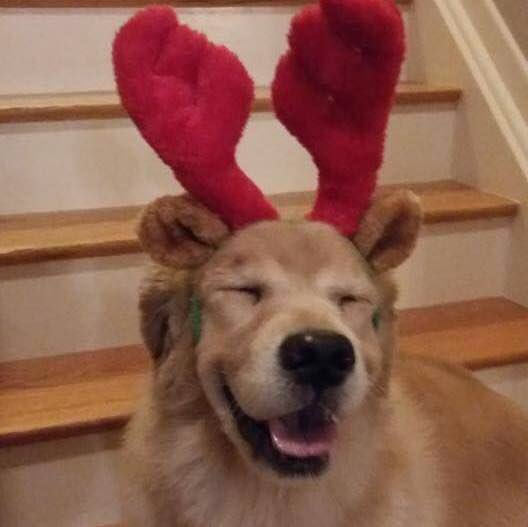

In [55]:
highest_rating = merged_cp.ratings.max()
data = merged_cp.query('ratings == @highest_rating')
Image(details_fun(data))